### Simple Neural Network

https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

In [3]:
def compute_loss(y_hat, y):
    return ((y_hat - y)**2).sum()

In [4]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [5]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

y = np.array([[1],
              [0],
              [0],
              [1]])

nn = NeuralNetwork(X,y)

loss_values = []

for i in range(600):
    nn.feedforward()
    nn.backprop()
    loss = compute_loss(nn.output, y)
    loss_values.append(loss)

print(nn.output)
print(f" final loss : {loss}")

[[0.97378713]
 [0.04523829]
 [0.04962468]
 [0.94590587]]
 final loss : 0.008122400542199143


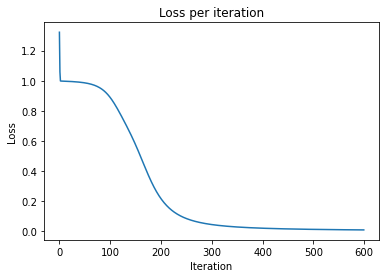

<Figure size 432x288 with 0 Axes>

In [6]:
plt.title("Loss per iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.figure()
plt.show()